#  importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt
import emoji
from autocorrect import Speller
from wordcloud import WordCloud
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer,LancasterStemmer,SnowballStemmer,WordNetLemmatizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,f1_score,make_scorer
from sklearn.compose import ColumnTransformer
import pickle
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder,FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# data collection

In [ ]:
data=pd.read_csv(r"C:\Users\dell\Downloads\reviews_data_dump\reviews_badminton\data.csv")

In [ ]:
df=data.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [ ]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


# problem statement-sentimental analysis on yonex mavis 350 nylon shuttle

# EDA to explore the data and DATA CLEANING

In [ ]:
df.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [ ]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [ ]:
df.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [ ]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [ ]:
#Handling null values
df["Month"]=df["Month"].astype("string")
df["Month"]=df["Month"].fillna("NA NA")

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Reviewer Name      0
Review Title       0
Place of Review    0
Up Votes           0
Down Votes         0
Month              0
Review text        0
Ratings            0
dtype: int64

In [ ]:
df["difference in upvotes and downvotes"]=df["Up Votes"]-df["Down Votes"]

In [ ]:
df.describe()

,Up Votes,Down Votes,Ratings,difference in upvotes and downvotes
count,8013.000000,8013.000000,8013.000000,8013.000000
mean,0.386747,0.123424,4.198178,0.263322
std,11.849649,3.334320,1.244423,10.098926
min,0.000000,0.000000,1.000000,-4.000000
25%,0.000000,0.000000,4.000000,0.000000
50%,0.000000,0.000000,5.000000,0.000000
75%,0.000000,0.000000,5.000000,0.000000
max,889.000000,219.000000,5.000000,825.000000


In [ ]:
#Extract month and year of product reviewed
def extract_month_and_year(input_string):
    parts = input_string.split()
    year = parts[-1]
    month = ' '.join(parts[:-1])
    return month, year

df[['month', 'year']] = df['Month'].apply(lambda x: pd.Series(extract_month_and_year(x)))

In [ ]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,difference in upvotes and downvotes,month,year
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,825.0,Feb,2021
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,103.0,Feb,2021
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,39.0,Apr,2021
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.READ MORE,5,128.0,Oct,2018
6,Flipkart Customer,Must buy!,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,BEST PURCHASE It is a good quality and is more...,5,282.0,Jan,2020


In [ ]:
df["month"].value_counts()

Oct    846
Dec    767
Jan    744
Nov    678
Mar    666
May    658
Feb    636
Aug    628
Sep    627
Jun    621
Jul    620
Apr    522
Name: month, dtype: int64

Product were reviewed in all the months. We can consider that product was purchased in all months

In [ ]:
df.duplicated().sum()

0

In [ ]:
#Place of review
df["Place of Review"].value_counts()

Certified Buyer, Bengaluru    300
Certified Buyer, Hyderabad    242
Certified Buyer, Chennai      214
Certified Buyer, Bangalore    209
Certified Buyer, New Delhi    149
                             ... 
Certified Buyer, Bahraich       1
Certified Buyer, Kurasia        1
Certified Buyer, Giddalur       1
Certified Buyer, Jahanabad      1
Certified Buyer, Raebareli      1
Name: Place of Review, Length: 2262, dtype: int64

In [ ]:
#Extract Place from "Place Of Review"
def city(input_string):
    parts = input_string.split(", ")
    city = parts[-1]
    return city

df[["city"]] = df['Place of Review'].apply(lambda x: pd.Series(city(x)))

In [ ]:
#To remove district from city
def city1(input_string):
    parts = input_string.split()
    city1 = parts[0]
    return city1

In [ ]:
#Data manipulation of "City"
def replace_city(val):
    val = val.lower()
    if  ('bang' in val) or ("beng" in val) :
        return 'Bengaluru'
    elif 'hyd' in val :
        return 'Hyderabad'
    elif 'mang' in val:
        return 'Mangalore'
    elif "district" in val:
        return  city1(val).capitalize()
    else:
        return val.capitalize()

In [ ]:
df["city"]=df["city"].apply(replace_city)

In [ ]:
df["city"].nunique()

2003

The reviewer of the product are from 2003 unique cities

In [ ]:
df["Ratings"].value_counts()

5    4803
4    1659
1     688
3     575
2     288
Name: Ratings, dtype: int64

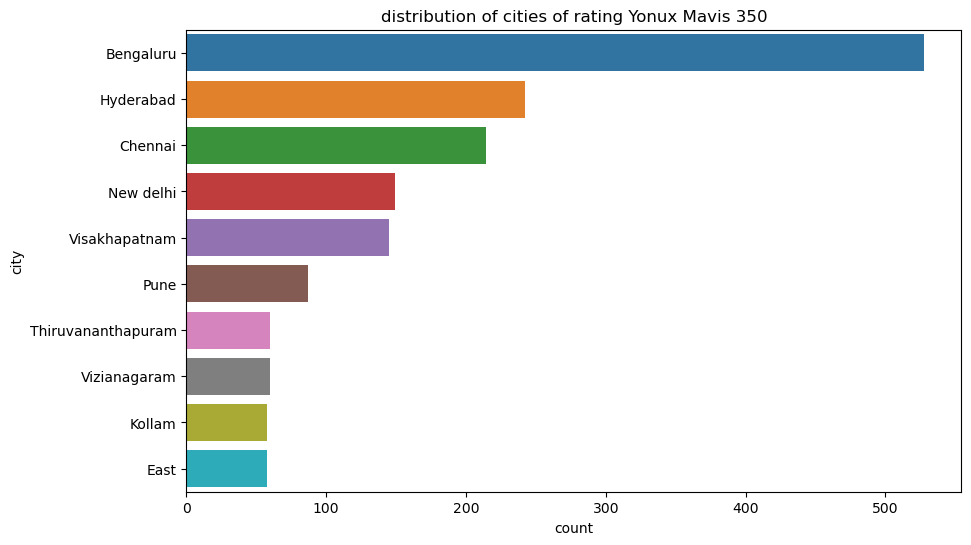

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,y="city",order=df["city"].value_counts().index[:10])
plt.title("distribution of cities of rating Yonux Mavis 350")
plt.show()

"Bengaluru" is the city where "Yonux Mavis 350" was mostly reviewed from , followed by Hyderabad , Chennai , New Delhi , and Mangalore is the 10th city.

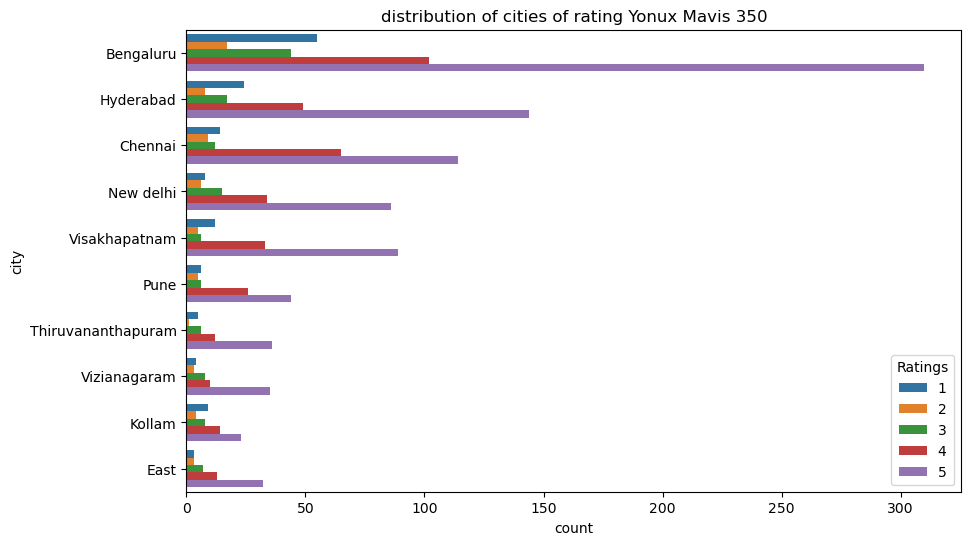

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,y="city",order=df["city"].value_counts().index[:10],hue="Ratings")
plt.title("distribution of cities of rating Yonux Mavis 350")
plt.show()

From all the cities , the product is mostly reviewed as 5 and 4 . hence, product was good

In [ ]:
df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings',
       'difference in upvotes and downvotes', 'month', 'year', 'city'],
      dtype='object')

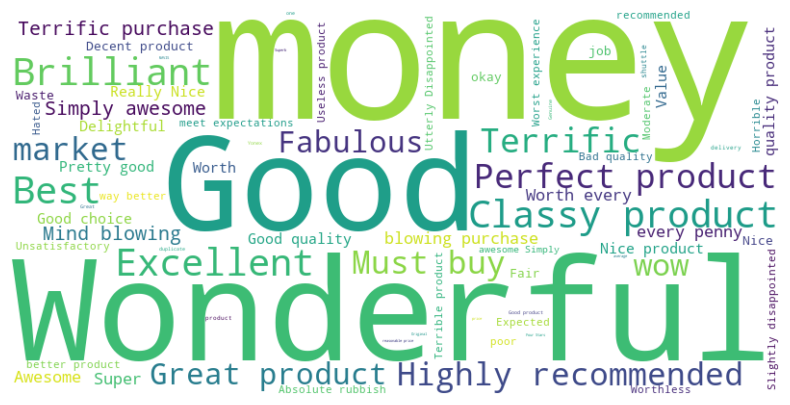

In [ ]:
text = " ".join(i for i in df["Review Title"])
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 4. text preprocessing

In [ ]:
#Taking the required columns
df1=df.iloc[:,6:8]

In [ ]:
dfc=df1.copy()

In [ ]:
dfc.head()

,Review text,Ratings
0,"Nice product, good quality, but price is now r...",4
1,They didn't supplied Yonex Mavis 350. Outside ...,1
2,Worst product. Damaged shuttlecocks packed in ...,1
5,Good quality product. Delivered on time.READ MORE,5
6,BEST PURCHASE It is a good quality and is more...,5


In [ ]:
dfc["Ratings"].value_counts()

5    4803
4    1659
1     688
3     575
2     288
Name: Ratings, dtype: int64

In [ ]:
dfc = dfc.rename(columns={
    'Review text': 'Review_Text',
    'Ratings': 'Rating'
})

In [ ]:
dfc.head()

,Review_Text,Rating
0,"Nice product, good quality, but price is now r...",4
1,They didn't supplied Yonex Mavis 350. Outside ...,1
2,Worst product. Damaged shuttlecocks packed in ...,1
5,Good quality product. Delivered on time.READ MORE,5
6,BEST PURCHASE It is a good quality and is more...,5


In [ ]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8013 entries, 0 to 8507
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_Text  8013 non-null   object
 1   Rating       8013 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 187.8+ KB


In [ ]:
def edat(data,name):
    case=" ".join(dfc[name]).islower()
    html_tags=dfc[name].apply(lambda x:True if re.search("<.+?>",x) else False).sum()
    url=dfc[name].apply(lambda x:True if re.search("http[s]?://.+? +",x) else False).sum()
    unwanted_chars=dfc[name].apply(lambda x:True if re.search("[]()*\-:;\".,@#$%^&0-9]",x) else False).sum()
    if case==False:
        print("not in lower case")
    if html_tags>0:
        print("have html tags")
    if url>0:
        print("have urls")
    if unwanted_chars>0:
        print("have unwanted characters")

In [ ]:
edat(dfc,"Review_Text")

not in lower case
have unwanted characters


In [ ]:
stp=stopwords.words("english")
stp.remove("not")

In [ ]:
fv=dfc.iloc[:,0]
cv=dfc.iloc[:,-1]

In [ ]:
fv

0       Nice product, good quality, but price is now r...
1       They didn't supplied Yonex Mavis 350. Outside ...
2       Worst product. Damaged shuttlecocks packed in ...
5       Good quality product. Delivered on time.READ MORE
6       BEST PURCHASE It is a good quality and is more...
                              ...                        
8495    Thanks to the delivery boy ... Service is alwa...
8496    Over priced even after 50% discount price is m...
8497    Too much priced. It was getting me for Rs. 640...
8499    Hii flipkart customers care..why your delivery...
8507                         Nice delivery speedREAD MORE
Name: Review_Text, Length: 8013, dtype: object

In [ ]:
cv

0       4
1       1
2       1
5       5
6       5
       ..
8495    5
8496    1
8497    1
8499    5
8507    5
Name: Rating, Length: 8013, dtype: int64

In [ ]:
cv= cv.map(lambda x: "Negative" if x in [1, 2] else ("Positive" if x in [3, 4, 5] else x))

In [ ]:
cv

0       Positive
1       Negative
2       Negative
5       Positive
6       Positive
          ...   
8495    Positive
8496    Negative
8497    Negative
8499    Positive
8507    Positive
Name: Rating, Length: 8013, dtype: object

In [ ]:
cv.value_counts()

Positive    7037
Negative     976
Name: Rating, dtype: int64

In [ ]:
# splitting the data into xtrain and x_test
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=3,stratify=cv)

In [ ]:
x_train=x_train.str.replace("READ MORE","")

In [ ]:
x_test=x_test.str.replace("READ MORE","")

In [ ]:
def lower(x):
    return x.str.lower()

In [ ]:
def textpp(x,correct,emojii):
    if emojii==True:
        x=emoji.demojize(x)
    x=re.sub("<.+?>"," ",x)
    x=re.sub("http[s]?://.+? +"," ",x)
    x=re.sub("[]()!_*\-:;\".,@#$%^&0-9]"," ",x)

    if correct=="t":
        x=TextBlob(x).correct().string
    else:
        x=x

    return x

In [ ]:
def pre_pro(x):
    return x.apply(textpp,args=("s",True))

In [ ]:
def advpp(x,stemm): ## tokenization,removing stopwords,stemming
    ps=PorterStemmer()
    ls=LancasterStemmer()
    ss=SnowballStemmer(language="english")
    wl=WordNetLemmatizer()

    l=[]
    for word in word_tokenize(x):
        if word in stp:
            pass
        else:
            if stemm=="p":
                l.append(ps.stem(word))
            elif stemm=="l":
                l.append(ls.stem(word))
            elif stemm=="s":
                l.append(ss.stem(word))
            elif stemm=="lemma":
                l.append(wl.lemmatize(word,pos="v"))
            else:
                l.append(word)

    return " ".join(l)

In [ ]:
def stw_advpp(x):
    return x.apply(lambda x : advpp(x,"lemma"))

# creating pipeline for preprocessing

In [ ]:
# pipe line for preprocessing. removing html tags,urls,unwanted characters and converting into lower case,demozije and stemmimg
pre_pro_pip=Pipeline([("lower",FunctionTransformer(lower)),
    ("preprocessing",FunctionTransformer(pre_pro)),
                     ("stp_stemmimg",FunctionTransformer(stw_advpp))])

In [ ]:
pre_pro_pip

Pipeline(steps=[('lower',
                 FunctionTransformer(func=<function lower at 0x000001A9165CBAC0>)),
                ('preprocessing',
                 FunctionTransformer(func=<function pre_pro at 0x000001A91662C0D0>)),
                ('stp_stemmimg',
                 FunctionTransformer(func=<function stw_advpp at 0x000001A91662C700>))])

In [ ]:
# transformed the x_train data which is learned in pipeline
fx_train=pre_pro_pip.fit_transform(x_train)

In [ ]:
fx_train

3380                     awesome
1438                    not good
4300                   good time
3416    perfect highly recommend
3580              number product
                  ...           
1861                good product
5257         work well door game
839              not bad 's good
2935          quality go day day
6613                good product
Name: Review_Text, Length: 6410, dtype: object

# Exploratory Data Analysis after preprocessing

In [ ]:
eda_data=pd.concat([fx_train,y_train],axis=1)

In [ ]:
eda_data

,Review_Text,Rating
3380,awesome,Positive
1438,not good,Negative
4300,good time,Positive
3416,perfect highly recommend,Positive
3580,number product,Positive
...,...,...
1861,good product,Positive
5257,work well door game,Positive
839,not bad 's good,Positive
2935,quality go day day,Positive


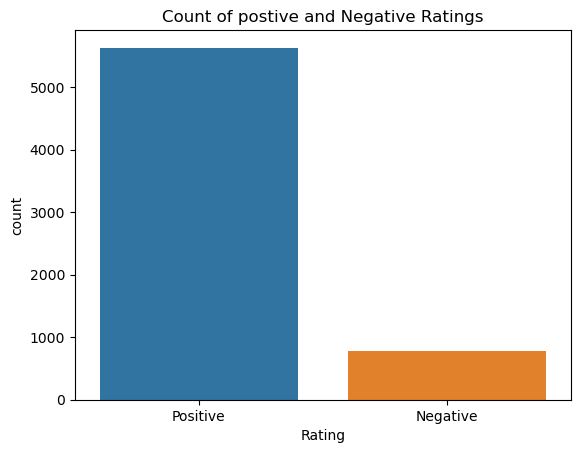

In [ ]:
sns.countplot(x=eda_data["Rating"])
plt.title("Count of postive and Negative Ratings")
plt.show()

We can cleary see that there are more positive reviwes are given by the customers

In [ ]:
# creating separate dataframe for negative
negative=eda_data[eda_data["Rating"]=="Negative"]

In [ ]:
negative

,Review_Text,Rating
1438,not good,Negative
5560,flipkart cheat customers send old shuttle box ...,Negative
4258,quality not good,Negative
289,poor quality,Negative
7899,good product worst delivery service,Negative
...,...,...
3021,bad,Negative
2385,not suitable indoor badminton standard players...,Negative
2806,item not upto markshuttle demaged days think s...,Negative
745,waste product high speed shuttle not useful in...,Negative


In [ ]:
# creating separate dataframe for Positive
positive=eda_data[eda_data["Rating"]=="Positive"]

In [ ]:
positive

,Review_Text,Rating
3380,awesome,Positive
4300,good time,Positive
3416,perfect highly recommend,Positive
3580,number product,Positive
5764,good,Positive
...,...,...
1861,good product,Positive
5257,work well door game,Positive
839,not bad 's good,Positive
2935,quality go day day,Positive


In [ ]:
# for loop to join the text that belongs to pos
f=[]
for word in " ".join(positive["Review_Text"]).split():
        f.append(word)

In [ ]:
# counting the most common words using counter function
Counter(f).most_common(10)

[('good', 2467),
 ('product', 1375),
 ('nice', 948),
 ('quality', 681),
 ('shuttle', 672),
 ('best', 353),
 ('one', 298),
 ('delivery', 264),
 ('original', 258),
 ('super', 258)]

In [ ]:
# for loop to join the mails that belongs to negative
f1=[]
for word in " ".join(negative["Review_Text"]).split():
        f1.append(word)

In [ ]:
# counting the most common words using counter function
Counter(f1).most_common(10)

[('quality', 275),
 ('not', 262),
 ('shuttle', 242),
 ('product', 214),
 ('bad', 165),
 ('good', 158),
 ('thumb', 134),
 ('worst', 84),
 ('poor', 80),
 ('buy', 59)]

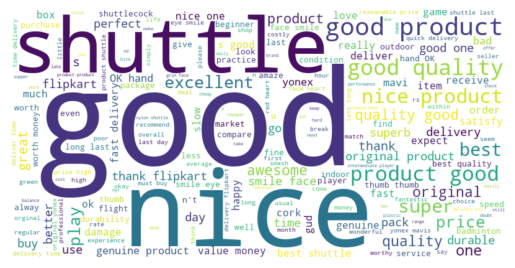

In [ ]:
# for visualizing the most repeated or common words in text belongs positive we can use wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(positive["Review_Text"]))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

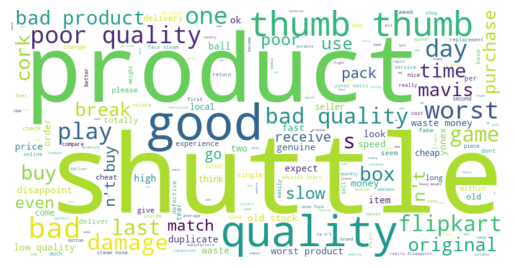

In [ ]:
# for visualizing the most repeated or common words in text belongs negative we can use wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(negative["Review_Text"]))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
fx_test=pre_pro_pip.transform(x_test)

In [ ]:
fy_train=y_train.map({"Positive":1,"Negative":0})

In [ ]:
fy_test=y_test.map({"Positive":1,"Negative":0})

# model creation / training

In [ ]:
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()
naive_bayes = MultinomialNB()
logistic_regression = LogisticRegression()
svm = SVC()
random_forest = RandomForestClassifier()

In [ ]:
# Create pipelines
pipelines = {
    "Naive Bayes": Pipeline([
        ("vectorizer", count_vectorizer),
        ("classifier", naive_bayes)
    ]),
    "Logistic Regression": Pipeline([
        ("vectorizer", count_vectorizer),
        ("classifier", logistic_regression)
    ]),
    "SVM": Pipeline([
        ("vectorizer", count_vectorizer),
        ("classifier", svm)
    ]),
    "Random Forest": Pipeline([
        ("vectorizer", tfidf_vectorizer),
        ("classifier", random_forest)
    ])
}

# Grid search parameters
param_grids = {
    "Naive Bayes": {"classifier__alpha": [1, 5, 10, 15]},
    "Logistic Regression": {"classifier__C": [0.01, 0.1, 1, 10, 100],"classifier__penalty": ["l1", "l2"],
                            "classifier__solver": ["saga"]},
    "SVM": {"classifier__C": [0.01, 0.1, 1, 10, 100], "classifier__kernel": ["linear", "rbf"]},
    "Random Forest": {"classifier__n_estimators": [25, 50, 75, 100]}
}

# Define the scorer
scorer = make_scorer(f1_score, average='binary')

best_models = {}

# Grid Search with pipelines
for name, pipeline in pipelines.items():
    print("*"*10, name , "*"*10)
    grid_search = GridSearchCV(pipeline, param_grid=param_grids[name], cv=3, scoring=scorer, return_train_score=True)
    grid_search.fit(fx_train, fy_train)
    best_model = grid_search.best_estimator_
    best_models[name] = {
        "best_params": grid_search.best_params_,
        "best_score": grid_search.best_score_,
        "best_estimator": best_model
    }

    # Evaluation
    y_pred = best_model.predict(fx_test)
    f1 = f1_score(fy_test, y_pred)
    print(f"{name} - F1 Score: {f1}")

# Print best parameters and scores for each model
for name, model_info in best_models.items():
    print("*"*10, name , "*"*10)
    print(f"{name} - Best Parameters: {model_info['best_params']}, Best F1 Score: {model_info['best_score']}")


********** Naive Bayes **********
Naive Bayes - F1 Score: 0.9587123862841147
********** Logistic Regression **********
Logistic Regression - F1 Score: 0.9496352900312609
********** SVM **********
SVM - F1 Score: 0.9616871704745167
********** Random Forest **********
Random Forest - F1 Score: 0.9591907917683989
********** Naive Bayes **********
Naive Bayes - Best Parameters: {'classifier__alpha': 1}, Best F1 Score: 0.9526944754067491
********** Logistic Regression **********
Logistic Regression - Best Parameters: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}, Best F1 Score: 0.9507356083818355
********** SVM **********
SVM - Best Parameters: {'classifier__C': 10, 'classifier__kernel': 'rbf'}, Best F1 Score: 0.9577555425303262
********** Random Forest **********
Random Forest - Best Parameters: {'classifier__n_estimators': 100}, Best F1 Score: 0.9614931885573251


In [ ]:
for name, model_info in best_models.items():
    model = model_info['best_estimator']
    filename = f"{name}_model.pkl"
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [ ]:
for name, model_info in best_models.items():
    print("*"*10, name, "*"*10)

    y_test_pred = model.predict(fx_test)
    print("Test Score (F1)",f1_score(fy_test, y_test_pred))


********** Naive Bayes **********
Test Score (F1) 0.9591907917683989
********** Logistic Regression **********
Test Score (F1) 0.9591907917683989
********** SVM **********
Test Score (F1) 0.9591907917683989
********** Random Forest **********
Test Score (F1) 0.9591907917683989
